 # Chapter 10. Planetary Rings
 
 ## Action by Diana C. Zapata. University of Antioquia

In this notebook we will present part of the theoretical background of the chapter devoted to the *Planetary Ring Systems* and some mathematical and numerical results which are interested for the theory.

The reader is reminded to install all libraries before importing them.

In [1]:
# !pip install -q tqdm

In [2]:
# !pip install -q astroquery spiceypy pandas rebound

In [5]:
# Standard library
import matplotlib.pyplot as plt
import numpy as np

# Related third party imports
import pandas as pd
from tqdm import tqdm

# Library specific
from astropy import constants as c
import astropy.units as u
from astroquery.jplhorizons import Horizons
import spiceypy as spy
from matplotlib.font_manager import FontProperties

## Constants

In [6]:
au = c.au.to('km') # Astronomical units
days = 86400       # Seconds

## Data planets

In [7]:
planets = ['599','699','799','899']

### Radii

In [8]:
spy.furnsh('data/pck00011.tpc')

In [9]:
radius = np.array([None]*len(planets))

for i in range (len(planets)):
    n, radius[i] = spy.bodvrd(planets[i], 'RADII', 3) 

In [10]:
jupiter_radius = radius[0].mean()
saturn_radius = radius[1].mean()
uranus_radius = radius[2].mean()
neptune_radius = radius[3].mean()

### Mass (GM)

In [11]:
spy.furnsh('data/gm_de431.tpc') 

In [12]:
masses_GM = np.array([None]*len(planets))

for i in range(len(masses_GM)):
    n = i+5
    n = str(n)
    masses_GM[i] = spy.bodvrd(n, 'GM', 1)[1]

### Period

In [13]:
T = np.array([None]*len(planets))

for i in tqdm(range(len(planets))):
    T[i] = Horizons(id=planets[i], location='@0').elements()['P'][0]*days

100%|█████████████████████████████████████████████| 4/4 [00:07<00:00,  1.83s/it]


## Data satellites

        599 Jupiter

        501 Io          502 Europa      503 Ganymede    504 Callisto
        505 Amalthea    506 Himalia     507 Elara       508 Pasiphae
        509 Sinope      510 Lysithea    511 Carme       512 Ananke
        513 Leda        514 Thebe       515 Adrastea    516 Metis


        699 Saturn

        601 Mimas       602 Enceladus   603 Tethys      604 Dione
        605 Rhea        606 Titan       607 Hyperion    608 Iapetus
        609 Phoebe      610 Janus       611 Epimetheus  612 Helene
        613 Telesto     614 Calypso     615 Atlas       616 Prometheus
        617 Pandora     618 Pan         632 Methone     633 Pallene
        634 Polydeuces  635 Daphnis     649 Anthe       653 Aegaeon


        799 Uranus

        701 Ariel       702 Umbriel     703 Titania     704 Oberon
        705 Miranda     706 Cordelia    707 Ophelia     708 Bianca
        709 Cressida    710 Desdemona   711 Juliet      712 Portia
        713 Rosalind    714 Belinda     715 Puck


        899 Neptune

        801 Triton      802 Nereid      803 Naiad       804 Thalassa
        805 Despina     806 Galatea     807 Larissa     808 Proteus       
        


Metis
Adrastea
Amalthea
Thebe

In [14]:
jupiter_satellites = ['516', '515', '505', '514']


Pan 
Atlas 
Prometheus 
Pandora 
Epimetheus 
Janus 
Mimas 
Enceladus 
Tethys

In [15]:
saturn_satellites = ['618', '615', '616', '617', '611', '610', '601', '602', '603']


Cordelia
Ophelia
Bianca
Cressida
Desdemona
Juliet
Portia
Rosalind
Belinda
Puck

In [16]:
uranus_satellites = ['706', '707', '708', '709', '710', '711', '712', '713', '714', '715', '705']


Naiad
Thalassa
Despina
Galatea
Larissa
Proteus

In [17]:
neptune_satellites = ['803', '804', '805', '806', '807', '808']

In [18]:
jupiter_names = ['M', 'Ad', 'Am', 'T']
saturn_names = ['Pan', 'A', 'Pr', 'Pd', 'Ep', 'J', 'M', 'E', 'T']
uranus_names = ['Co', 'O', 'Bi', 'Cr', 'D', 'J', 'Po', 'R', 'Be', 'Pu', 'M']
neptune_names = ['N', 'T', 'D', 'G', 'L', 'P']

### Semi-major axis 

In [19]:
jupiter_axes = np.array([None]*len(jupiter_satellites))
saturn_axes = np.array([None]*len(saturn_satellites))
uranus_axes = np.array([None]*len(uranus_satellites))
neptune_axes = np.array([None]*len(neptune_satellites))

In [20]:
for i in tqdm(range(len(jupiter_axes))):
    jupiter_axes[i] = Horizons(id = jupiter_satellites[i], 
                               location='@599').elements()['a'][0]*au
    
for i in tqdm(range(len(saturn_axes))):
    saturn_axes[i] = Horizons(id = saturn_satellites[i], 
                              location='@699').elements()['a'][0]*au
    
for i in tqdm(range(len(uranus_axes))):
    uranus_axes[i] = Horizons(id = uranus_satellites[i], 
                              location='@799').elements()['a'][0]*au
    
for i in tqdm(range(len(neptune_axes))):
    neptune_axes[i] = Horizons(id = neptune_satellites[i], 
                               location='@899').elements()['a'][0]*au

100%|█████████████████████████████████████████████| 6/6 [00:07<00:00,  1.23s/it]


### Radii

In [21]:
jupiter_satellites_radius = np.array([None]*len(jupiter_satellites))
saturn_satellites_radius = np.array([None]*len(saturn_satellites))
uranus_satellites_radius = np.array([None]*len(uranus_satellites))
neptune_satellites_radius = np.array([None]*len(neptune_satellites))

In [22]:
for i in range(len(jupiter_satellites_radius)):
    jupiter_satellites_radius[i] = spy.bodvrd(jupiter_satellites[i],
                                              'RADII', 3)[1].mean()
    
for i in range(len(saturn_satellites_radius)):
    saturn_satellites_radius[i] = spy.bodvrd(saturn_satellites[i],
                                             'RADII', 3)[1].mean()
    
for i in range(len(uranus_satellites_radius)):
    uranus_satellites_radius[i] = spy.bodvrd(uranus_satellites[i],
                                             'RADII', 3)[1].mean()
    
for i in range(len(neptune_satellites_radius)):
    neptune_satellites_radius[i] = spy.bodvrd(neptune_satellites[i],
                                              'RADII', 3)[1].mean()

## Data ring systems

In [23]:
# Jupiter's ring system
halo = ['halo', 89400, 123000]
main = ['main', 123000, 128940]
gossamer = ['gossamer', 128940, 242000]

jupiter_ring_systems = pd.DataFrame([halo, main, gossamer],
                                    columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])
jupiter_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,halo,89400,123000
1,main,123000,128940
2,gossamer,128940,242000


In [24]:
jupiter_inner_edge = np.array(jupiter_ring_systems['Inner Edge (km)'])
jupiter_outer_edge = np.array(jupiter_ring_systems['Outer Edge (km)'])

In [25]:
# Saturn's ring system
D_ring = ['D', 66900, 74658]
C_ring = ['C', 74658, 91975]
B_ring = ['B', 91975, 117507]
A_ring = ['A', 122340, 136780]
F_ring = ['F', 140219, 140269]
G_ring = ['G', 166000, 173200]
E_ring = ['E', 180000, 480000]

saturn_ring_systems = pd.DataFrame([D_ring, C_ring, B_ring, A_ring,
                                    F_ring, G_ring, E_ring],
                                   columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])
saturn_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,D,66900,74658
1,C,74658,91975
2,B,91975,117507
3,A,122340,136780
4,F,140219,140269
5,G,166000,173200
6,E,180000,480000


In [26]:
saturn_inner_edge = np.array(saturn_ring_systems['Inner Edge (km)'])
saturn_outer_edge = np.array(saturn_ring_systems['Outer Edge (km)'])

In [27]:
# Uranus's ring system
six_ring = ['6', 41837, 41852]
five_ring = ['5', 42334, 42236]
four_ring = ['4', 42571, 42573.5]
α_ring = ['α', 44718, 44725]
β_ring = ['β', 45661, 45669]
η_ring = ['η', 47176, 47177.6]
γ_ring = ['γ', 47627, 47629.5]
δ_ring = ['δ', 48300, 48305]
λ_ring = ['λ', 50024, 50026]
ε_ring = ['ε', 51149, 51265]

uranus_ring_systems = pd.DataFrame([six_ring, five_ring, four_ring,
                                    α_ring, β_ring, η_ring, γ_ring,
                                    δ_ring, λ_ring, ε_ring],
                                   columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])
uranus_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,6,41837,41852.0
1,5,42334,42236.0
2,4,42571,42573.5
3,α,44718,44725.0
4,β,45661,45669.0
5,η,47176,47177.6
6,γ,47627,47629.5
7,δ,48300,48305.0
8,λ,50024,50026.0
9,ε,51149,51265.0


In [28]:
uranus_inner_edge = np.array(uranus_ring_systems['Inner Edge (km)'])
uranus_outer_edge = np.array(uranus_ring_systems['Outer Edge (km)'])

In [29]:
# Neptune's ring system
galle = ['Galle', 42000, 44000]
le_verrier = ['Le Verrier', 53200, 53299]
lassell = ['Lassell', 53200, 57200]
adams = ['Adams', 62932.57, 62947.57]

neptune_ring_systems = pd.DataFrame([galle, le_verrier, lassell,adams],
                                    columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])
neptune_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,Galle,42000.00,44000.00
1,Le Verrier,53200.00,53299.00
2,Lassell,53200.00,57200.00
3,Adams,62932.57,62947.57


In [30]:
neptune_inner_edge = np.array(neptune_ring_systems['Inner Edge (km)'])
neptune_outer_edge = np.array(neptune_ring_systems['Outer Edge (km)'])

 ## Section 10.1: Introduction

 ## Section 10.2: Planetary Ring Systems

### Plot of the systems

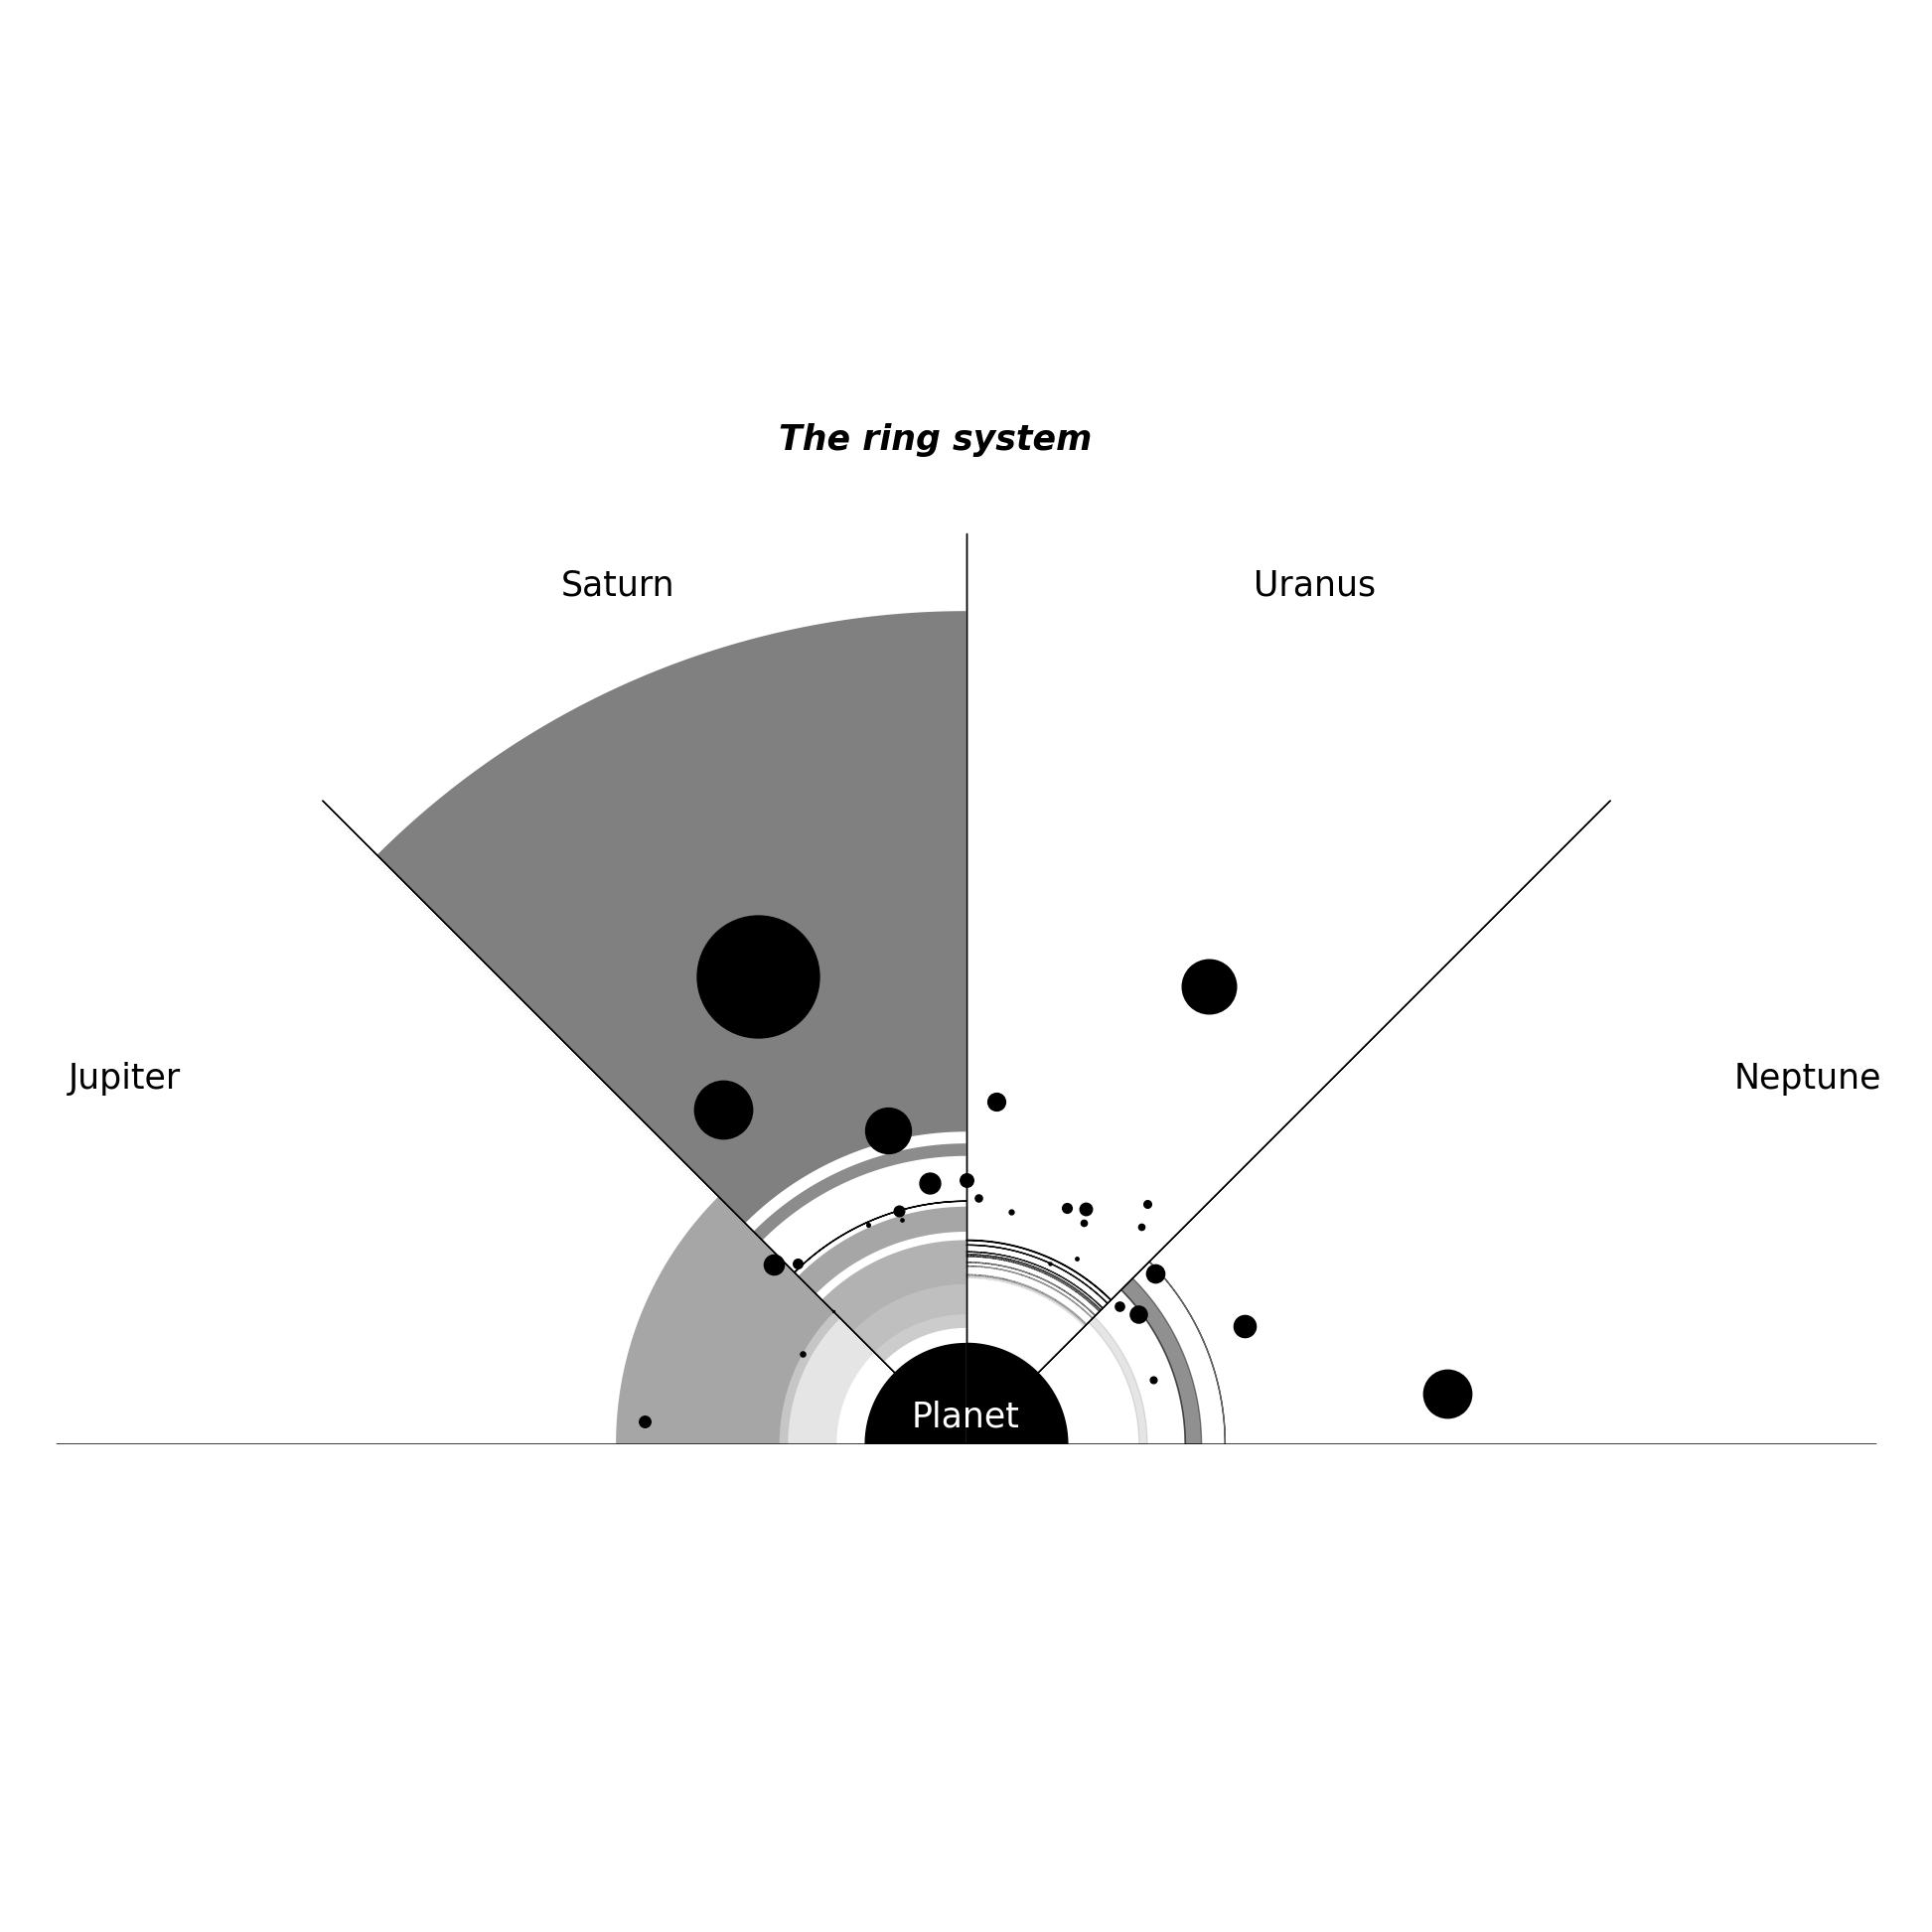

In [31]:
factor = 1
fig = plt.figure(figsize = (25*factor,25*factor))
ax = fig.add_subplot(111, polar = True)

font = FontProperties(style='italic', weight='bold', size='x-large')
fig.text(0.5, 0.7, 'The ring system', fontproperties = font, fontsize = 25,
          ha='center', va='bottom')

# Plot of Jupiter
theta = np.linspace(3*np.pi/4, np.pi, 100)
r = jupiter_radius

ax.fill_between(theta, 0, jupiter_radius/r, color = 'black' )

ax.annotate('Jupiter', xy = (0, 0), xytext = (157.5*np.pi/180, 9),
            ha = 'center', va = 'bottom', color = 'black', 
            fontsize = 25, textcoords = 'data')

# Ring system
alpha = 0.1

for i in range(len(jupiter_inner_edge)):
    ax.fill_between(theta, jupiter_inner_edge[i]/r, 
                    jupiter_outer_edge[i]/r, 
                    facecolor = 'black', alpha = alpha)
    alpha += 1/8
    
# Plot satellites
for i in range(len(jupiter_axes)):
    theta = np.random.randint(low = 135, high = 180)*np.pi/180
    ax.plot(theta, jupiter_axes[i]/r, 'o', color = 'black',
            markersize = jupiter_satellites_radius[i]/6*factor)
    
    
    
# Plot of Saturn
theta = np.linspace(np.pi/2, 3*np.pi/4, 100)
r = saturn_radius

ax.fill_between(theta, 0, saturn_radius/r, facecolor = 'black')

ax.annotate('Saturn', xy = (0, 0), xytext = (112.5*np.pi/180, 9),
            ha = 'center', va = 'bottom', color = 'black', 
            fontsize = 25, textcoords = 'data')

# Ring system
alpha = 0.2

for i in range(len(saturn_inner_edge)):
    ax.fill_between(theta, saturn_inner_edge[i]/r, 
                    saturn_outer_edge[i]/r,
                    facecolor = 'black', alpha = alpha)
    alpha += 1/20
    
ax.fill_between(theta, saturn_inner_edge[4]/r,
                saturn_outer_edge[4]/r,
                color = 'black', alpha = 1)

# Plot satellites
for i in range(len(saturn_axes)):
    theta = np.random.randint(low = 90, high = 135)*np.pi/180
    ax.plot(theta, saturn_axes[i]/r, 'o', color='black',
            markersize = saturn_satellites_radius[i]/6*factor)
    
    
    
# Plot of Uranus
theta = np.linspace(np.pi/2, np.pi/4, 100)
r = uranus_radius

ax.fill_between(theta, 0, uranus_radius/r, color = 'black')

ax.annotate('Uranus', xy = (0, 0), xytext = (67.5*np.pi/180, 9),
            ha = 'center', va = 'bottom', color = 'black',
            fontsize = 25, textcoords = 'data')

# Ring system
alpha = 0.1

for i in range(len(uranus_inner_edge)):
    ax.fill_between(theta, uranus_inner_edge[i]/r, 
                    uranus_outer_edge[i]/r, 
                    color = 'black', alpha = alpha)
    alpha += 1/10
    
# Plot satellites
for i in range(len(uranus_axes)):
    theta = np.random.randint(low = 45, high = 90)*np.pi/180
    ax.plot(theta, uranus_axes[i]/r, 'o', color='black',
            markersize = uranus_satellites_radius[i]/6*factor) 

    
    
# Plot of Neptune
theta = np.linspace(0, np.pi/4, 100)
r = neptune_radius

ax.fill_between(theta, 0, neptune_radius/r, color = 'black')

ax.annotate('Neptune', xy = (0, 0), xytext = (22.5*np.pi/180, 9),
            ha = 'center', va = 'bottom', color = 'black',
            fontsize = 25, textcoords = 'data')

# Ring system
alpha = 0.1

for i in range(len(neptune_inner_edge)):
    ax.fill_between(theta, neptune_inner_edge[i]/r,
                    neptune_outer_edge[i]/r,
                    color = 'black', alpha = alpha)
    alpha += 1/6
    
# Plot satellites
for i in range(len(neptune_axes)):
    theta = np.random.randint(low = 0, high = 45)*np.pi/180
    ax.plot(theta, neptune_axes[i]/r, 'o', color='black',
            markersize = neptune_satellites_radius[i]/6*factor)
    
    
    
for i in [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]:
    r = np.linspace(0, 9)
    ax.fill_between(i, r, color = 'black') 
  
ax.annotate('Planet', xy = (0,0), xytext = (np.pi/2, 0.1),
            ha = 'center', va = 'bottom', color = 'white',
            fontsize = 25, textcoords = 'data')


ax.set_thetamin(0)
ax.set_thetamax(180)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')

plt.show()

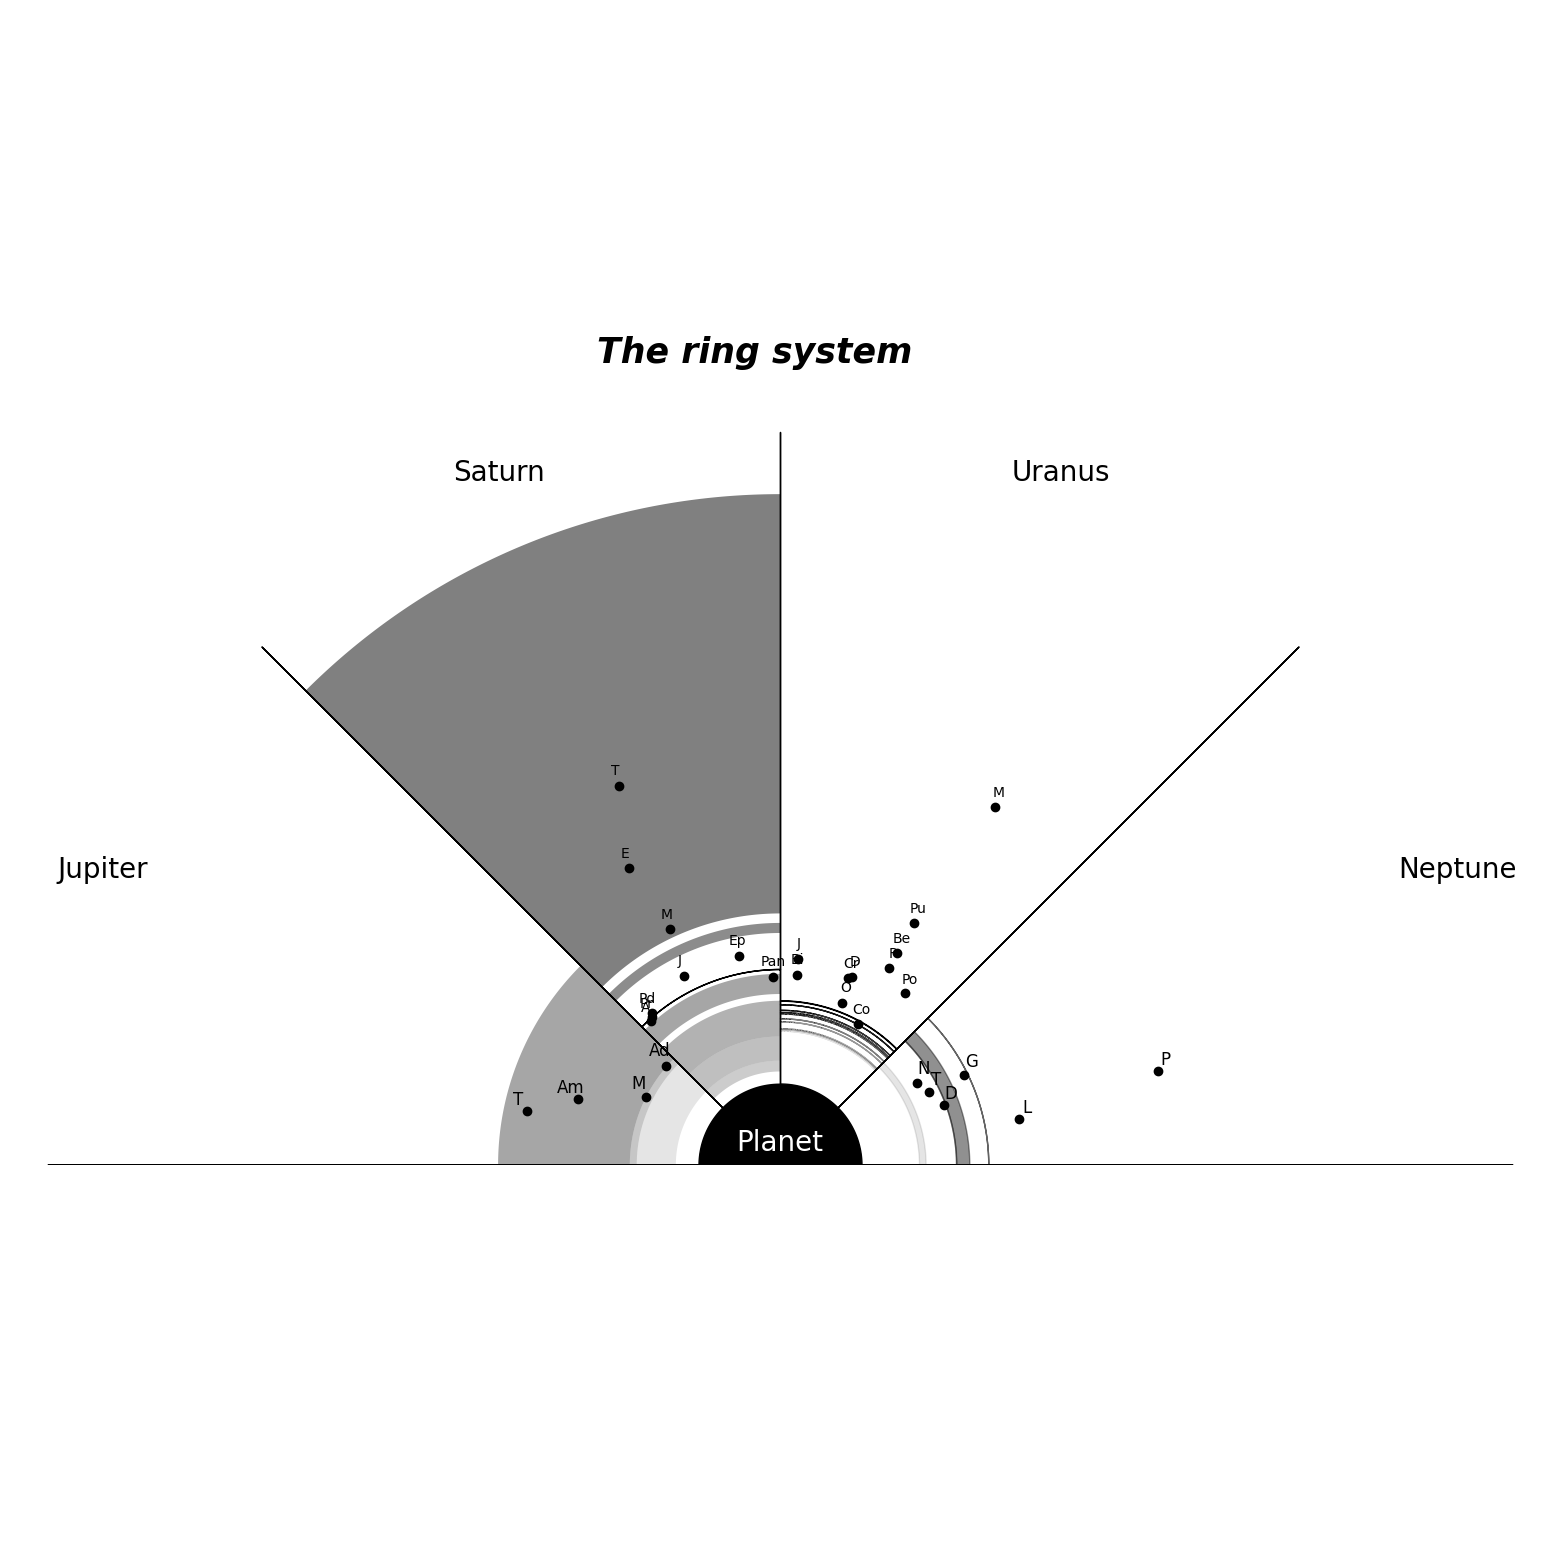

In [32]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar = True)

font = FontProperties(style='italic', weight='bold', size='x-large')
fig.text(0.5, 0.7, 'The ring system', fontproperties = font, fontsize = 25,
          ha='center', va='bottom')

# Plot of Jupiter
theta = np.linspace(3 * np.pi/4,np.pi, 100)

ax.fill_between(theta, 0, jupiter_radius/jupiter_radius, color = 'black' )

ax.annotate('Jupiter', xy=(0,0), xytext=(157.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')


# Ring system
alpha = 0.1
for i in range(len(jupiter_inner_edge)):
    ax.fill_between(theta, jupiter_inner_edge[i]/jupiter_radius, 
                    jupiter_outer_edge[i]/jupiter_radius, facecolor = 'black', alpha = alpha)
    alpha += 1/8
    
# Plot satellites
for i in range(len(jupiter_axes)):
    theta = np.random.randint(low = 135, high = 180)*np.pi/180
    ax.plot(theta,jupiter_axes[i]/jupiter_radius,"o",color='black', markersize=6)
    ax.annotate(jupiter_names[i], xy=(0,0), xytext=(theta,(jupiter_axes[i].value/jupiter_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 12,
                textcoords='data')
    
    
    
# Plot of Saturn
theta = np.linspace(np.pi/2, 3 * np.pi/4, 100)

ax.fill_between(theta, 0, saturn_radius/saturn_radius, facecolor = 'black')

ax.annotate('Saturn', xy=(0,0), xytext=(112.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')

# Ring system
alpha = 0.2
for i in range(len(saturn_inner_edge)):
    ax.fill_between(theta, saturn_inner_edge[i]/saturn_radius, 
                    saturn_outer_edge[i]/saturn_radius, facecolor = 'black', alpha = alpha)
    alpha += 1/20
    
ax.fill_between(theta, saturn_inner_edge[4]/saturn_radius, 
                    saturn_outer_edge[4]/saturn_radius, color = 'black', alpha = 1)

# Plot satellites
for i in range(len(saturn_axes)):
    theta = np.random.randint(low = 90, high = 135)*np.pi/180
    ax.plot(theta,saturn_axes[i]/saturn_radius,"o",color='black', markersize=6)
    ax.annotate(saturn_names[i], xy=(0,0), xytext=(theta,(saturn_axes[i].value/saturn_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 10,
                textcoords='data')
    
    
    
# Plot of Uranus
theta = np.linspace(np.pi/2, np.pi/4, 100)

ax.fill_between(theta, 0, uranus_radius/uranus_radius, color = 'black')

ax.annotate('Uranus', xy=(0,0), xytext=(67.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')

# Ring system
alpha = 0.1
for i in range(len(uranus_inner_edge)):
    ax.fill_between(theta, uranus_inner_edge[i]/uranus_radius, 
                    uranus_outer_edge[i]/uranus_radius, color = 'black', alpha = alpha)
    alpha += 1/10
    
# Plot satellites
for i in range(len(uranus_axes)):
    theta = np.random.randint(low = 45, high = 90)*np.pi/180
    ax.plot(theta,uranus_axes[i]/uranus_radius,"o",color='black', markersize=6)
    ax.annotate(uranus_names[i], xy=(0,0), xytext=(theta,(uranus_axes[i].value/uranus_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 10,
                textcoords='data')

    
    
# Plot of Neptune
theta = np.linspace(0, np.pi/4, 100)

ax.fill_between(theta, 0, neptune_radius/neptune_radius, color = 'black')

ax.annotate('Neptune', xy=(0,0), xytext=(22.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')

# Ring system
alpha = 0.1
for i in range(len(neptune_inner_edge)):
    ax.fill_between(theta, neptune_inner_edge[i]/neptune_radius, 
                    neptune_outer_edge[i]/neptune_radius, color = 'black', alpha = alpha)
    alpha += 1/6
    
# Plot satellites
for i in range(len(neptune_axes)):
    theta = np.random.randint(low = 0, high = 45)*np.pi/180
    ax.plot(theta,neptune_axes[i]/neptune_radius,"o",color='black', markersize=6)    
    ax.annotate(neptune_names[i], xy=(0,0), xytext=(theta,(neptune_axes[i].value/neptune_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 12,
                textcoords='data')
    
    
    
for i in [0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi]:
    r = np.linspace(0,9)
    ax.fill_between(i, r, color = 'black') 
    
ax.annotate('Planet', xy=(0,0), xytext=(np.pi/2,0.1), ha='center', va='bottom', color = 'white', fontsize = 20,
            textcoords='data')
              
ax.set_thetamin(0)
ax.set_thetamax(180)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')

plt.show()

 ### Section 10.2.1: The Rings of Jupiter

<img src="\images\Ring system of Jupiter.png">

$$a_k = \Big(\frac{k\mp 1}{k}\Big)^{2/3}r_s$$  


$$r_s = \sqrt[3]{\frac{G M T^2}{4\pi^2}}$$

In [53]:
rs = (masses_GM*T**2/(4*np.pi**2))**(1/3)/1e3

In [56]:
rs

array([array([76407.0430956]), array([93959.70893856]),
       array([101041.79895096]), array([167332.36356354])], dtype=object)

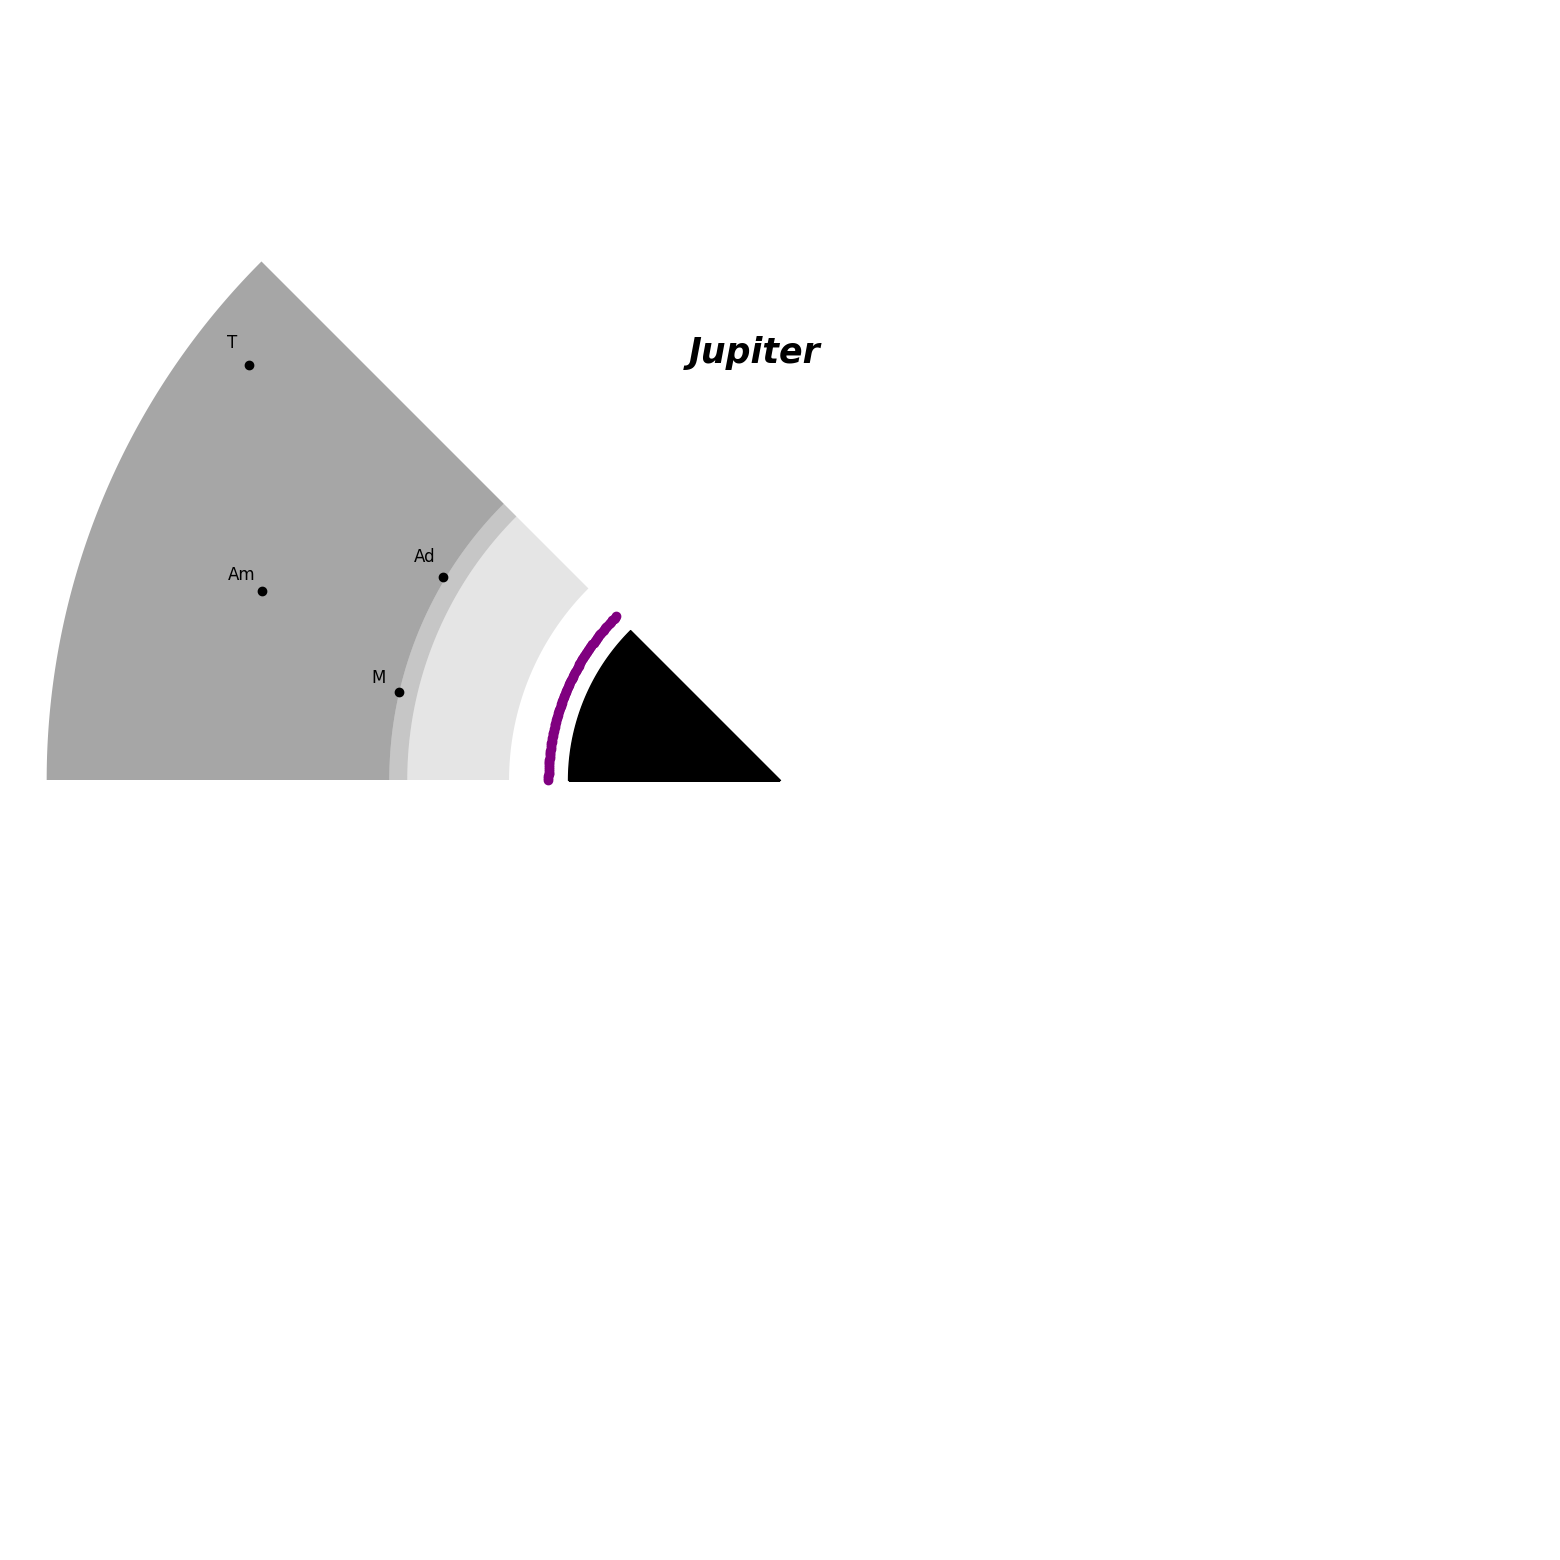

In [61]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar = True)

font = FontProperties(style='italic', weight='bold', size='x-large')
fig.text(0.5, 0.7, 'Jupiter', fontproperties = font, fontsize = 25,
          ha='center', va='bottom')

# Plot of Jupiter
theta = np.linspace(3 * np.pi/4,np.pi, 100)

ax.fill_between(theta, 0, jupiter_radius/jupiter_radius, color = 'black' )



# Ring system
alpha = 0.1
for i in range(len(jupiter_inner_edge)):
    ax.fill_between(theta, jupiter_inner_edge[i]/jupiter_radius, 
                    jupiter_outer_edge[i]/jupiter_radius, facecolor = 'black', alpha = alpha)
    alpha += 1/8
    
# Plot satellites
for i in range(len(jupiter_axes)):
    theta = np.random.randint(low = 135, high = 180)*np.pi/180
    ax.plot(theta,jupiter_axes[i]/jupiter_radius,"o",color='black', markersize=6)
    ax.annotate(jupiter_names[i], xy=(0,0), xytext=(theta,(jupiter_axes[i].value/jupiter_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 12,
                textcoords='data')
    
theta = np.linspace(3 * np.pi/4,np.pi, 100)
for i in range (len(theta)):
    ax.plot(theta[i],rs[0]/jupiter_radius,"o-",color='purple')
 
    
              

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')

plt.show()

 ### Section 10.2.2: The Rings of Saturn

https://lasp.colorado.edu/home/voyager/mission/software/

 ### Section 10.2.3: The Rings of Uranus

 ### Section 10.2.4: The Rings of Neptune

 ### Section 10.2.5: Rings and Satellites

 ## Section 10.3: Resonances in Rings

### Section 10.3.1: Perturbations in Semi-major Axis and Corotation Resonances

### Section 10.3.2: Perturbations in Eccentricity and Lindblad Resonances

### Section 10.3.3: Perturbations in Inclination and Vertical Resonances

### Section 10.3.4: Locations of Resonances

## Section 10.4: Density Waves and Bending Waves

## Section 10.5: Narrow Rings and Sharp Edges

### Section 10.5.1: Spreading Timescales